In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the train and test datas

In [2]:
def read_data(file_path):
    with open(file_path) as f:
        raw = f.read().splitlines()
    
    array = np.array([list(filter(lambda x: x != '', row.split(' '))) for row in raw], dtype=float)
    
    if array.shape[1] == 1:
        return array[:, 0]
    
    return array

In [3]:
# Read in the train data
trn_x = read_data('../Datasets/trn_x.txt')
trn_x_class = read_data('../Datasets/trn_x_class.txt')
trn_y = read_data('../Datasets/trn_y.txt')
trn_y_class = read_data('../Datasets/trn_y_class.txt')

trn_x.shape, trn_x_class.shape, trn_y.shape, trn_y_class.shape

((6742, 2), (6742,), (5421, 2), (5421,))

In [4]:
trn_xy = np.concatenate((trn_x, trn_y), axis=0)
trn_xy_class = np.concatenate((trn_x_class, trn_y_class), axis=0)

trn_xy.shape, trn_xy_class.shape

((12163, 2), (12163,))

In [5]:
# Read in the test data
tst_xy = read_data('../Datasets/tst_xy.txt')
tst_xy_class = read_data('../Datasets/tst_xy_class.txt')

tst_xy.shape, tst_xy_class.shape

((2027, 2), (2027,))

## Plot the train and test datas

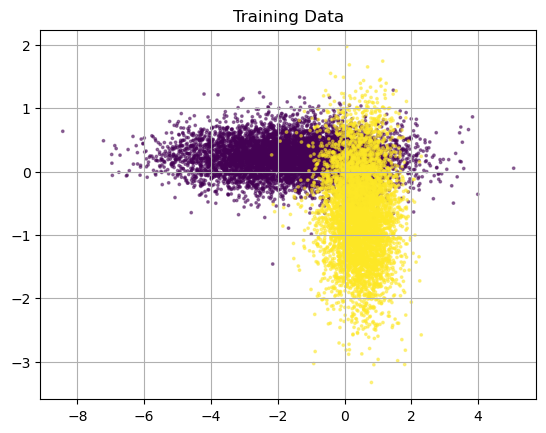

In [6]:
plt.scatter(trn_xy[:, 0], trn_xy[:, 1], c=trn_xy_class, s=3, alpha=0.5)
plt.title('Training Data')
plt.grid()
plt.savefig('../Images/trn_xy.png')

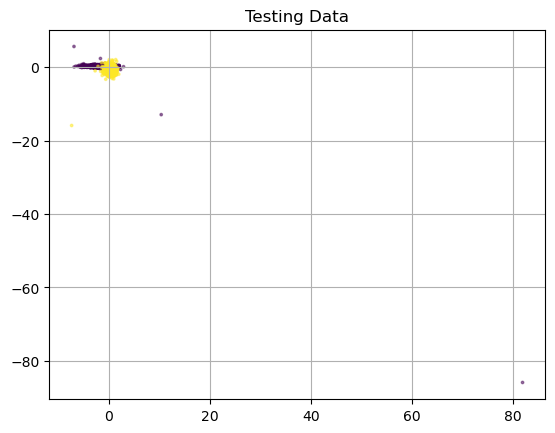

In [7]:
plt.scatter(tst_xy[:, 0], tst_xy[:, 1], c=tst_xy_class, s=3, alpha=0.5)
plt.title('Testing Data')
plt.grid()
plt.savefig('../Images/tst_xy.png')

## Task (a) - Use KNeighborsClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=12)

model.fit(trn_xy, trn_xy_class)

model.score(tst_xy, tst_xy_class)

0.9126788357178096

In [10]:
accuracies = []

for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trn_xy, trn_xy_class)
    accuracy = model.score(tst_xy, tst_xy_class)
    
    accuracies.append([k, accuracy])
    
accuracies = np.array(accuracies)

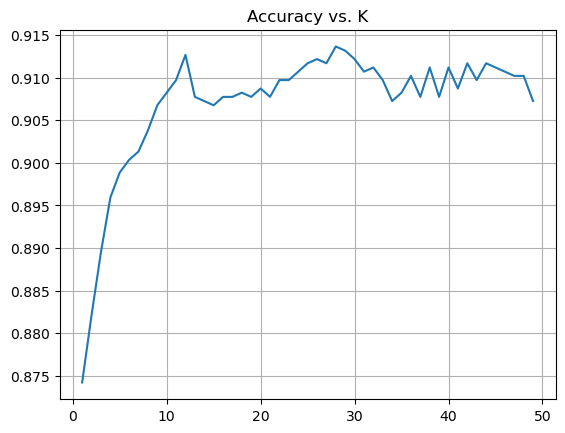

In [11]:
plt.plot(accuracies[:, 0], accuracies[:, 1])
plt.title('Accuracy vs. K')
plt.grid()